In [75]:
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [76]:
df=pd.read_csv("ADANIPORTS.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [77]:
df=df[['Date','High']]
df.head()

,Date,High
0,2007-11-27,1050.00
1,2007-11-28,990.00
2,2007-11-29,914.75
3,2007-11-30,958.00
4,2007-12-03,995.00


In [78]:
df.tail()

,Date,High
3317,2021-04-26,739.65
3318,2021-04-27,757.50
3319,2021-04-28,760.00
3320,2021-04-29,765.85
3321,2021-04-30,759.45


In [79]:
df.dtypes

,0
Date,object
High,float64


In [80]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].dtype

<ipython-input-80-61771029a961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


dtype('<M8[ns]')

In [81]:
df.dtypes

,0
Date,datetime64[ns]
High,float64


In [82]:
df.shape

(3322, 2)

In [83]:
from matplotlib import pyplot as plt

In [84]:
def plotting(x,y):
  plt.plot(x,y)
  plt.xlabel('Year')
  plt.ylabel('High')
  plt.show()

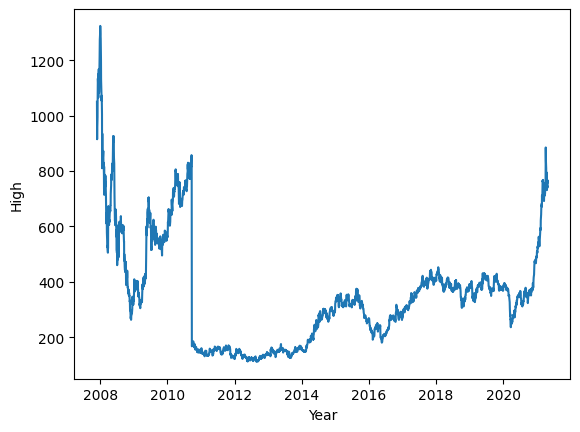

In [85]:
plotting(df['Date'],df['High'])

For a particular year High

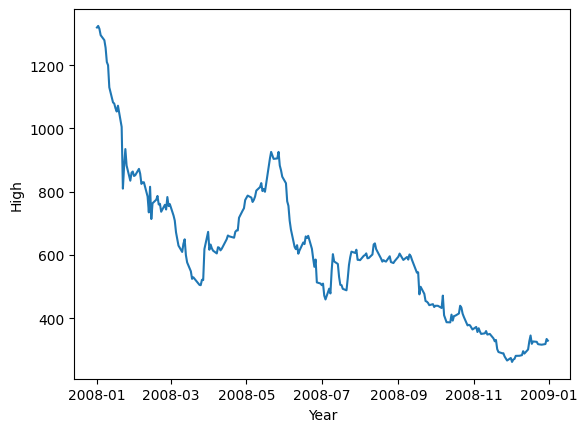

In [86]:
df1=df[df['Date'].dt.year==2008]
plotting(df1['Date'],df1['High'])

In [87]:
df.head()

,Date,High
0,2007-11-27,1050.00
1,2007-11-28,990.00
2,2007-11-29,914.75
3,2007-11-30,958.00
4,2007-12-03,995.00


In [88]:
df.isnull().sum()

,0
Date,0
High,0


In [89]:
df.describe()

,Date,High
count,3322,3322.000000
mean,2014-08-14 03:47:08.416616448,351.608007
min,2007-11-27 00:00:00,110.450000
25%,2011-04-07 06:00:00,168.000000
50%,2014-08-06 12:00:00,331.275000
75%,2017-12-18 18:00:00,407.187500
max,2021-04-30 00:00:00,1324.000000
std,NaN,198.617808


In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler=StandardScaler()
df['High']=scaler.fit_transform(df[['High']])
df.tail()

,Date,High
3317,2021-04-26,1.954006
3318,2021-04-27,2.043891
3319,2021-04-28,2.056480
3320,2021-04-29,2.085938
3321,2021-04-30,2.053710


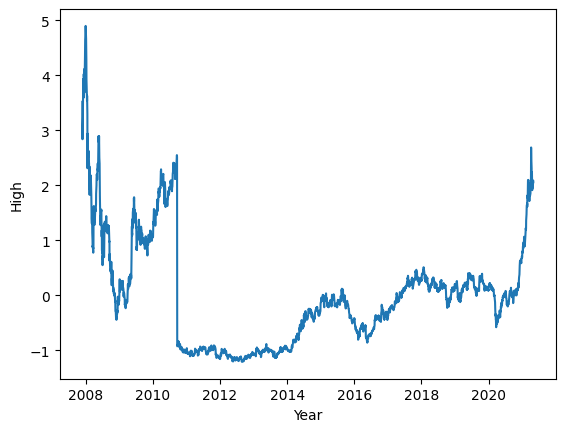

In [92]:
plotting(df['Date'],df['High'])

In [93]:
df.shape

(3322, 2)

In [94]:
no_of_rows=(0.8)*(df.shape[0])
no_of_rows

2657.6000000000004

In [95]:
import numpy as np

In [96]:
traning_rows=int(np.round(no_of_rows))
testing_rows=df.shape[0]-traning_rows
print(df.shape)
print(traning_rows)
print(testing_rows)

(3322, 2)
2658
664


In [97]:
training_df=df.iloc[0:traning_rows,:]
training_df.tail()

,Date,High
2653,2018-08-13,0.140955
2654,2018-08-14,0.136423
2655,2018-08-16,0.113260
2656,2018-08-17,0.138437
2657,2018-08-20,0.140452


In [98]:
testing_df=df.iloc[traning_rows:df.shape[0],:]
testing_df=testing_df.reset_index()
testing_df.head()

,index,Date,High
0,2658,2018-08-21,0.153040
1,2659,2018-08-23,0.171168
2,2660,2018-08-24,0.182247
3,2661,2018-08-27,0.154551
4,2662,2018-08-28,0.185268


when using tensorflow we need to send the inputs int he form of arrays or tensor objects

In [99]:
def create_data(window_size,df):

    x=[]
    y=[]

    for i in range(0,df.shape[0]-window_size):
        x.append(df.iloc[i:i+window_size])
        y.append(df.iloc[i+window_size])

    return np.array(x),np.array(y)

In [100]:
window_size=100
x_train,y_train=create_data(window_size,training_df['High'])

In [101]:
x_test,y_test=create_data(window_size,testing_df['High'])

In [102]:
x_train

array([[3.51679006, 3.21465687, 2.83573149, ..., 1.52749476, 1.62040071,
        1.6430607 ],
       [3.21465687, 2.83573149, 3.05351917, ..., 1.62040071, 1.6430607 ,
        1.64280892],
       [2.83573149, 3.05351917, 3.23983464, ..., 1.6430607 , 1.64280892,
        1.84498639],
       ...,
       [0.0775072 , 0.08606764, 0.08959253, ..., 0.15354405, 0.14095517,
        0.13642317],
       [0.08606764, 0.08959253, 0.06491832, ..., 0.14095517, 0.13642317,
        0.11325963],
       [0.08959253, 0.06491832, 0.10218141, ..., 0.13642317, 0.11325963,
        0.13843739]])

In [103]:
y_train

array([1.64280892, 1.84498639, 1.96130767, ..., 0.11325963, 0.13843739,
       0.14045161])

In [104]:
print(x_test,y_test)

[[0.1530405  0.17116849 0.18224671 ... 0.17318271 0.19684981 0.22076869]
 [0.17116849 0.18224671 0.15455116 ... 0.19684981 0.22076869 0.24342868]
 [0.18224671 0.15455116 0.18526804 ... 0.22076869 0.24342868 0.25727645]
 ...
 [0.32424931 0.37460484 0.45517369 ... 1.99051388 1.95400612 2.04389074]
 [0.37460484 0.45517369 0.46776258 ... 1.95400612 2.04389074 2.05647962]
 [0.45517369 0.46776258 0.53725321 ... 2.04389074 2.05647962 2.08593761]] [ 2.43428678e-01  2.57276450e-01  2.16992024e-01  2.03396030e-01
  1.75700487e-01  1.61852716e-01  1.19554069e-01  1.50663389e-02
 -1.28809816e-02 -4.98922979e-02 -2.42109764e-02 -6.44954023e-02
 -5.36689628e-02 -4.93887426e-02 -7.68325078e-02 -7.60771748e-02
 -8.89178355e-02 -1.09060049e-01 -1.08667603e-02  2.98101114e-03
  6.50589841e-03  6.50589841e-03 -1.56505359e-02  2.38785571e-02
  3.84816615e-02  3.52085519e-02 -6.07187374e-02 -1.26432707e-01
 -9.72264984e-02 -1.10318937e-01 -8.46376153e-02 -5.59349618e-02
 -1.21256486e-02 -4.58638553e-02 -4.

In [105]:
x_train.shape

(2558, 100)

For LSTM input should be in 3d format (no_of_samples,window_size,no_of_features)

In [106]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [107]:
x_train.shape

(2558, 100, 1)

In [108]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(window_size,1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [109]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - loss: 0.5113
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.4464
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.4254
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 0.4315
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.4286
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.4412
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.4380
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.4517
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.4214
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 0.4542


In [111]:
x_test_predicted=model.predict(x_test)
print(x_test_predicted)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
[[1.85486495e-01]
 [2.07147330e-01]
 [2.27736950e-01]
 [2.31641546e-01]
 [2.25562662e-01]
 [2.10521758e-01]
 [1.93234608e-01]
 [1.69121489e-01]
 [1.23746961e-01]
 [7.81950653e-02]
 [3.61803919e-02]
 [1.15624638e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.49504282e-04]
 [8.29894561e-03]
 [1.89741552e-02]
 [2.74931192e-02]
 [1.31543446e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.60624941e-03]
 [3.20540294e-02]
 [5.61672896e-02]
 [7.24820793e-02]
 [8.98514390e-02]
 [9.91103500e-02]
 [9.81733724e-02]
 [8.76177400e-02]
 [7.76506290e-02]
 [7.82187060e-02]
 [8.45014453e-02]
 [1.04222998e-01]
 [1.27916887e-01]
 [1.48106068e-01]
 [1.61504209e-01]
 [1.69567332e-01]
 [1.68

In [112]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x_test_predicted,y_test)

0.016650473687272137

In [113]:
y_test_original=scaler.inverse_transform(y_test.reshape(-1,1))
x_test_predicted_original=scaler.inverse_transform(x_test_predicted)

In [114]:
mean_squared_error(x_test_predicted_original,y_test_original)

656.6473035141613

In [115]:
x_test_predicted_original

array([[388.4434 ],
       [392.74496],
       [396.8338 ],
       [397.60922],
       [396.40204],
       [393.41507],
       [389.98206],
       [385.19348],
       [376.18265],
       [367.1366 ],
       [358.793  ],
       [353.90417],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.6377 ],
       [353.25607],
       [355.37604],
       [357.0678 ],
       [354.2203 ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [351.608  ],
       [352.12558],
       [357.97354],
       [362.76215],
       [366.00208],
       [369.45142],
       [371.29013],
       [371.10406],
       [369.00784],
       [367.02847],
       [367.1413 ],
       [368.38898],
       [372.30542],
       [377.01074],


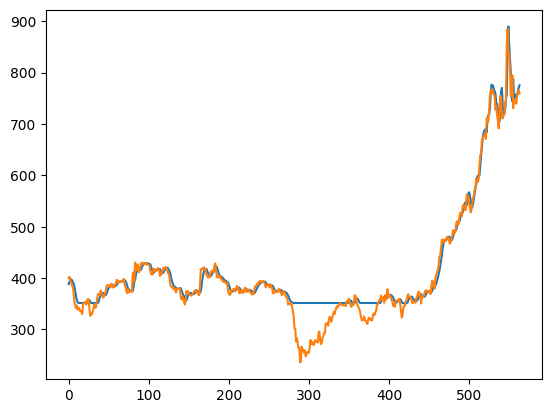

In [116]:
plt.plot(x_test_predicted_original)
plt.plot(y_test_original)
plt.show()

predicting for next 10 days

In [117]:
df.tail()

,Date,High
3317,2021-04-26,1.954006
3318,2021-04-27,2.043891
3319,2021-04-28,2.056480
3320,2021-04-29,2.085938
3321,2021-04-30,2.053710


In [118]:
df['High'].values

array([3.51679006, 3.21465687, 2.83573149, ..., 2.05647962, 2.08593761,
       2.05371007])

In [119]:
days=10
l=df.shape[0]
y=[]
r=[]

for i in range(0,days):

  x=df.iloc[l-window_size:df.shape[0],1].values
  if len(y)>0:
    for j in y:
      x=np.concatenate((x,j))

  x=x.reshape(1,100,1)
  y1=model.predict(x)
  y.append(y1[0])
  r.append(y1[0][0])
  l=l+1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


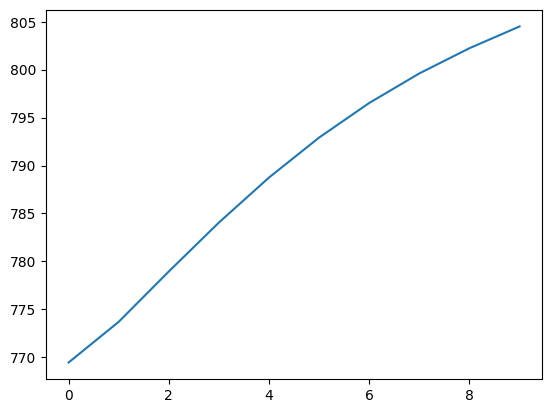

In [120]:
plt.plot(scaler.inverse_transform(np.array(y).reshape(-1,1)))
plt.show()

In [121]:
df.tail()

,Date,High
3317,2021-04-26,1.954006
3318,2021-04-27,2.043891
3319,2021-04-28,2.056480
3320,2021-04-29,2.085938
3321,2021-04-30,2.053710


In [122]:
last_date=df['Date'].iloc[-1]
last_date

Timestamp('2021-04-30 00:00:00')

In [123]:
predicting_dates=pd.date_range(start=last_date,periods=11)[1:]
predicting_dates

DatetimeIndex(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04',
               '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
               '2021-05-09', '2021-05-10'],
              dtype='datetime64[ns]', freq='D')

In [124]:
d={
    'Date':predicting_dates,
    'High':r
}

df_predicted=pd.DataFrame(data=d)
df_predicted.head()

,Date,High
0,2021-05-01,2.104128
1,2021-05-02,2.125500
2,2021-05-03,2.151938
3,2021-05-04,2.177627
4,2021-05-05,2.201263


In [125]:
df_new=pd.concat([df,df_predicted],axis=0,ignore_index=True)
df_new.tail()

,Date,High
3327,2021-05-06,2.222245
3328,2021-05-07,2.240406
3329,2021-05-08,2.255915
3330,2021-05-09,2.269149
3331,2021-05-10,2.280564


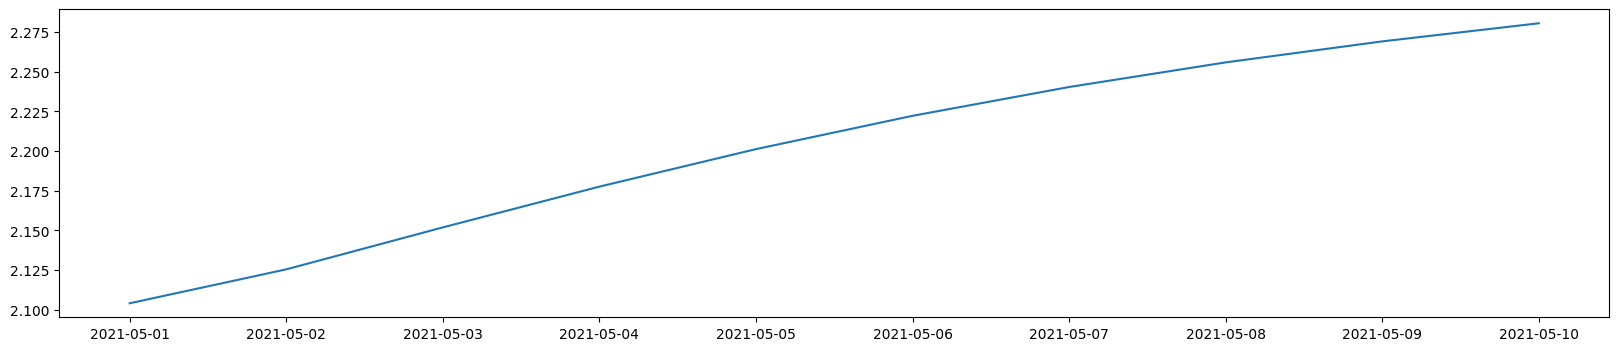

In [126]:
plt.figure(figsize=(20,4))
plt.plot(df_predicted['Date'],df_predicted['High'])
plt.show()

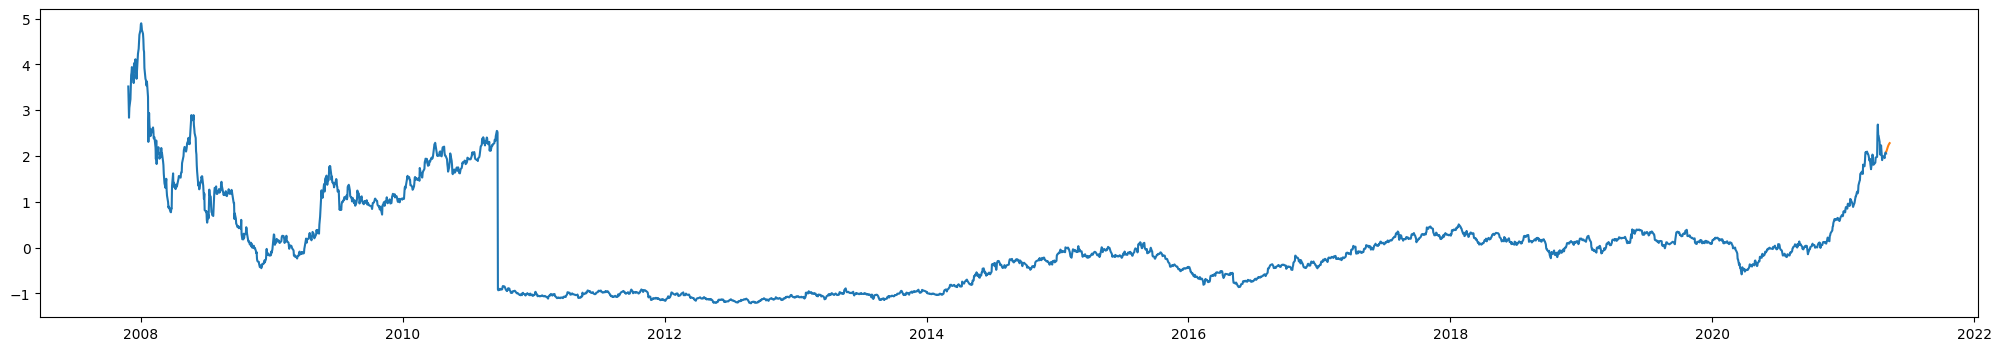

In [127]:
plt.figure(figsize=(25,4))
plt.plot(df['Date'],df['High'])
plt.plot(df_predicted['Date'],df_predicted['High'])
plt.show()